In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [2]:
X, y = load_boston().data, load_boston().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((506, 13), (506, 1))

In [44]:
class NN_build(object):
    def __init__(self, eta = 0.005, iterations = 1000, dims = [X.shape[1],50,50,1], lamb_ = 0.9, activation = 'relu'):
        self.eta = eta
        self.iterations = iterations
        self.dims = dims
        self.layers = len(dims)
        self.lamb_ = lamb_
        self.activation = activation
    
    def fit(self,X,y):
        X_ = X.T
        y_ = y.T
        A0 = X_
        m_ = len(y)
        i = 1
        cost_ =[]
        cost_mae_ = []
        parameters = {}
        
        for l in range(1,self.layers):  #he_init
            parameters['W'+str(l)] = np.random.randn(self.dims[l],self.dims[l-1]) * np.sqrt(2/self.dims[l-1])
            parameters['b'+str(l)] = np.zeros((self.dims[l],1))
            
            
        while(i != self.iterations+1):
            #forward prop
            Z1 =  np.dot(parameters['W1'],A0) + parameters['b1']
            if self.activation == 'relu':
                A1 =  self.relu(Z1)
            else:
                A1 = self.sigmoid(Z1)
            Z2 =  np.dot(parameters['W2'],A1) + parameters['b2']
            if self.activation == "relu":
                A2 =  self.relu(Z2)
            else:
                A2 = self.sigmoid(Z2)
            Z3 =  np.dot(parameters['W3'],A2) + parameters['b3']
            A3 =  Z3
            #cost
            l2_reg = (self.lamb_/(m_*2)) * (np.sum(np.square(parameters['W1'])) +  np.sum(np.square(parameters['W2'])) + np.sum(np.square(parameters['W3'])) )
            cost = self.MSE(y_,A3,m_) + l2_reg
            cost_.append(cost)
            mae = self.MAE(y_,A3,m_) + l2_reg
            cost_mae_.append(mae) 
            #derivative
            dZ3 = A3 - y_
            dW3 = (1/m_) * np.dot(dZ3, A2.T) + (self.lamb_/m_) * parameters['W3']
            db3 = (1/m_) * np.sum(dZ3, axis = 1, keepdims= True)
            if self.activation == 'relu':
                dZ2 = np.dot(parameters['W3'].T,dZ3) * np.where(A2>=0,1,0)  #(A2 * (1-A2))
            else:
                dZ2 = np.dot(parameters['W3'].T,dZ3) * (A2 * (1-A2))
            dW2 = (1/m_) * np.dot(dZ2, A1.T) + (self.lamb_/m_) * parameters['W2']
            db2 = (1/m_) * np.sum(dZ2, axis = 1, keepdims= True)
            if self.activation == 'relu':
                dZ1 = np.dot(parameters['W2'].T,dZ2) * np.where(A1>=0,1,0) # (A1 * (1-A1))
            else:
                dZ1 = np.dot(parameters['W2'].T,dZ2) *  (A1 * (1-A1))
            dW1 = (1/m_) * np.dot(dZ1, A0.T) + (self.lamb_/m_) * parameters['W1']
            db1 = (1/m_) * np.sum(dZ1, axis = 1, keepdims= True)          
            #updates
            parameters['W1'] -= self.eta * dW1
            parameters['W2'] -= self.eta * dW2
            parameters['W3'] -= self.eta * dW3
            parameters['b1'] -= self.eta * db1
            parameters['b2'] -= self.eta * db2
            parameters['b3'] -= self.eta * db3
            if i % 500 ==0:
                print('Epoch:{}: cost:{} MAE:{}'.format(i,cost,mae))
            
            i += 1
        history = pd.DataFrame(cost_, columns= ['cost'])
        history['mae'] = cost_mae_
        plt.figure(figsize = (14,4))
        plt.subplot(1,2,1)
        plt.plot(history.cost)
        plt.subplot(1,2,2)
        plt.plot(history.mae)
        plt.show()
        return parameters
    
    
    def MAE(self,y_true,y_pred,m_):
        return (1/m_) * np.sum(np.abs(y_true - y_pred))
    
    def MSE(self,y_true,y_pred,m_):
        return (1/m_) * np.sum(np.square(y_true - y_pred))
    
    def sigmoid(self,z):
        return 1 / (1+ np.exp(-z))
    
    def relu(self,z):
        return z * (z>0).astype(int)
        
    

Epoch:500: cost:103.21226073686799 MAE:8.081089888702598
Epoch:1000: cost:85.93181070104046 MAE:7.240997258902516
Epoch:1500: cost:80.08990918653593 MAE:6.925056641233189
Epoch:2000: cost:75.649795132363 MAE:6.690685352930299
Epoch:2500: cost:72.0490242597136 MAE:6.5022798003485835
Epoch:3000: cost:69.04135460830337 MAE:6.34123813531709
Epoch:3500: cost:66.43921687908372 MAE:6.203073387827905
Epoch:4000: cost:64.11195822528983 MAE:6.084764488331626
Epoch:4500: cost:62.04303788078639 MAE:5.9808061084296655
Epoch:5000: cost:60.18238768441132 MAE:5.886537683920138


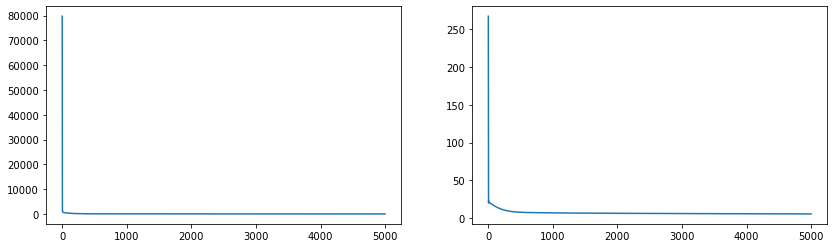

In [50]:
parameters = NN_build(eta = 0.0000005, iterations = 5000, dims = [X.shape[1],50,50,1], lamb_ = 0.9, activation='relu').fit(X,y)

<ipython-input-44-1f7a721e0327>:90: RuntimeWarning: overflow encountered in exp
  return 1 / (1+ np.exp(-z))


Epoch:500: cost:78.54151258615826 MAE:6.5794281490115365
Epoch:1000: cost:73.00224928489997 MAE:6.3014146373966815
Epoch:1500: cost:68.63753633471347 MAE:6.070552128790162
Epoch:2000: cost:65.44816920752451 MAE:5.8685756123189705
Epoch:2500: cost:62.47348105415073 MAE:5.798701467242342
Epoch:3000: cost:60.426513434647525 MAE:5.702818103370649
Epoch:3500: cost:58.889418455493654 MAE:5.652047091766613
Epoch:4000: cost:58.77565471012792 MAE:5.5838562819603
Epoch:4500: cost:58.750697707294314 MAE:5.73985881212914
Epoch:5000: cost:55.395372491828596 MAE:5.359457733791965


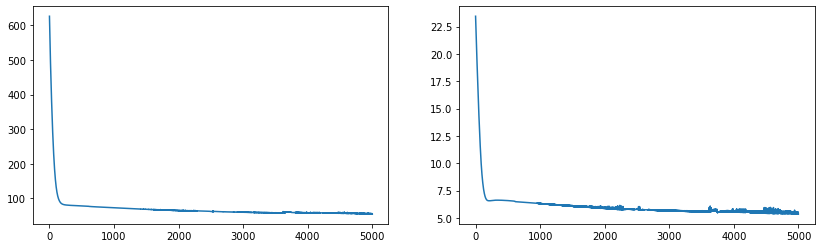

In [47]:
parameters = NN_build(eta = 0.0005, iterations = 5000, dims = [X.shape[1],50,50,1], lamb_ = 0.9, activation='sigmoid').fit(X,y)

In [33]:
b2 = np.array([[2,-1],[0,1]])
b2

array([[ 2, -1],
       [ 0,  1]])

In [35]:
np.where(b2>=0,1,0)

array([[1, 0],
       [1, 1]])